In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

### Read the dataset (0.25 M)

In [5]:
df=pd.read_csv('Diabetes.csv')

In [6]:
df

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.head(10)

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
df.dtypes

No. of times pregnant                               int64
Plasma glucose concentration                        int64
Diastolic blood pressure (mm Hg)                    int64
Triceps skin fold thickness (mm)                    int64
2-Hour serum insulin (mu U/ml)                      int64
Body mass index (weight in kg/(height in m)^2)    float64
Diabetes pedigree function                        float64
Age (years)                                         int64
Class variable (0 or 1)                             int64
dtype: object

In [12]:
df.describe()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualize the feature relationships

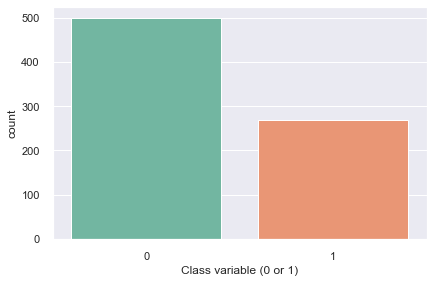

In [14]:
sns.countplot(x="Class variable (0 or 1)", data=df, palette="Set2")

In [15]:
df.isna().any()

No. of times pregnant                             False
Plasma glucose concentration                      False
Diastolic blood pressure (mm Hg)                  False
Triceps skin fold thickness (mm)                  False
2-Hour serum insulin (mu U/ml)                    False
Body mass index (weight in kg/(height in m)^2)    False
Diabetes pedigree function                        False
Age (years)                                       False
Class variable (0 or 1)                           False
dtype: bool

In [16]:
df.isna().sum()

No. of times pregnant                             0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skin fold thickness (mm)                  0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age (years)                                       0
Class variable (0 or 1)                           0
dtype: int64

In [17]:
df.corr()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
No. of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma glucose concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Diastolic blood pressure (mm Hg),0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps skin fold thickness (mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
2-Hour serum insulin (mu U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body mass index (weight in kg/(height in m)^2),0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age (years),0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class variable (0 or 1),0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


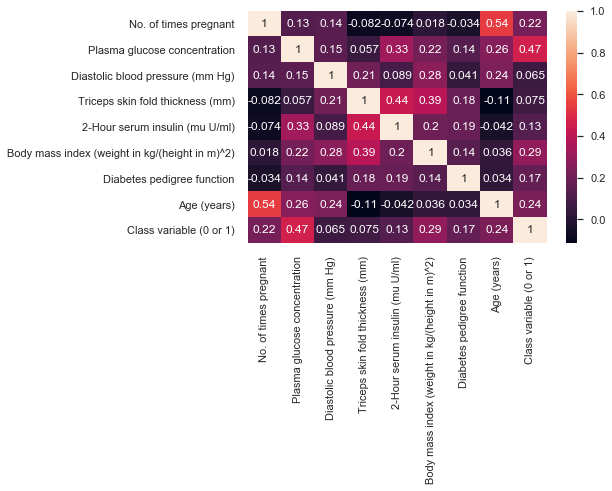

In [19]:
corr = df.corr()
sns.heatmap(corr, annot=True)

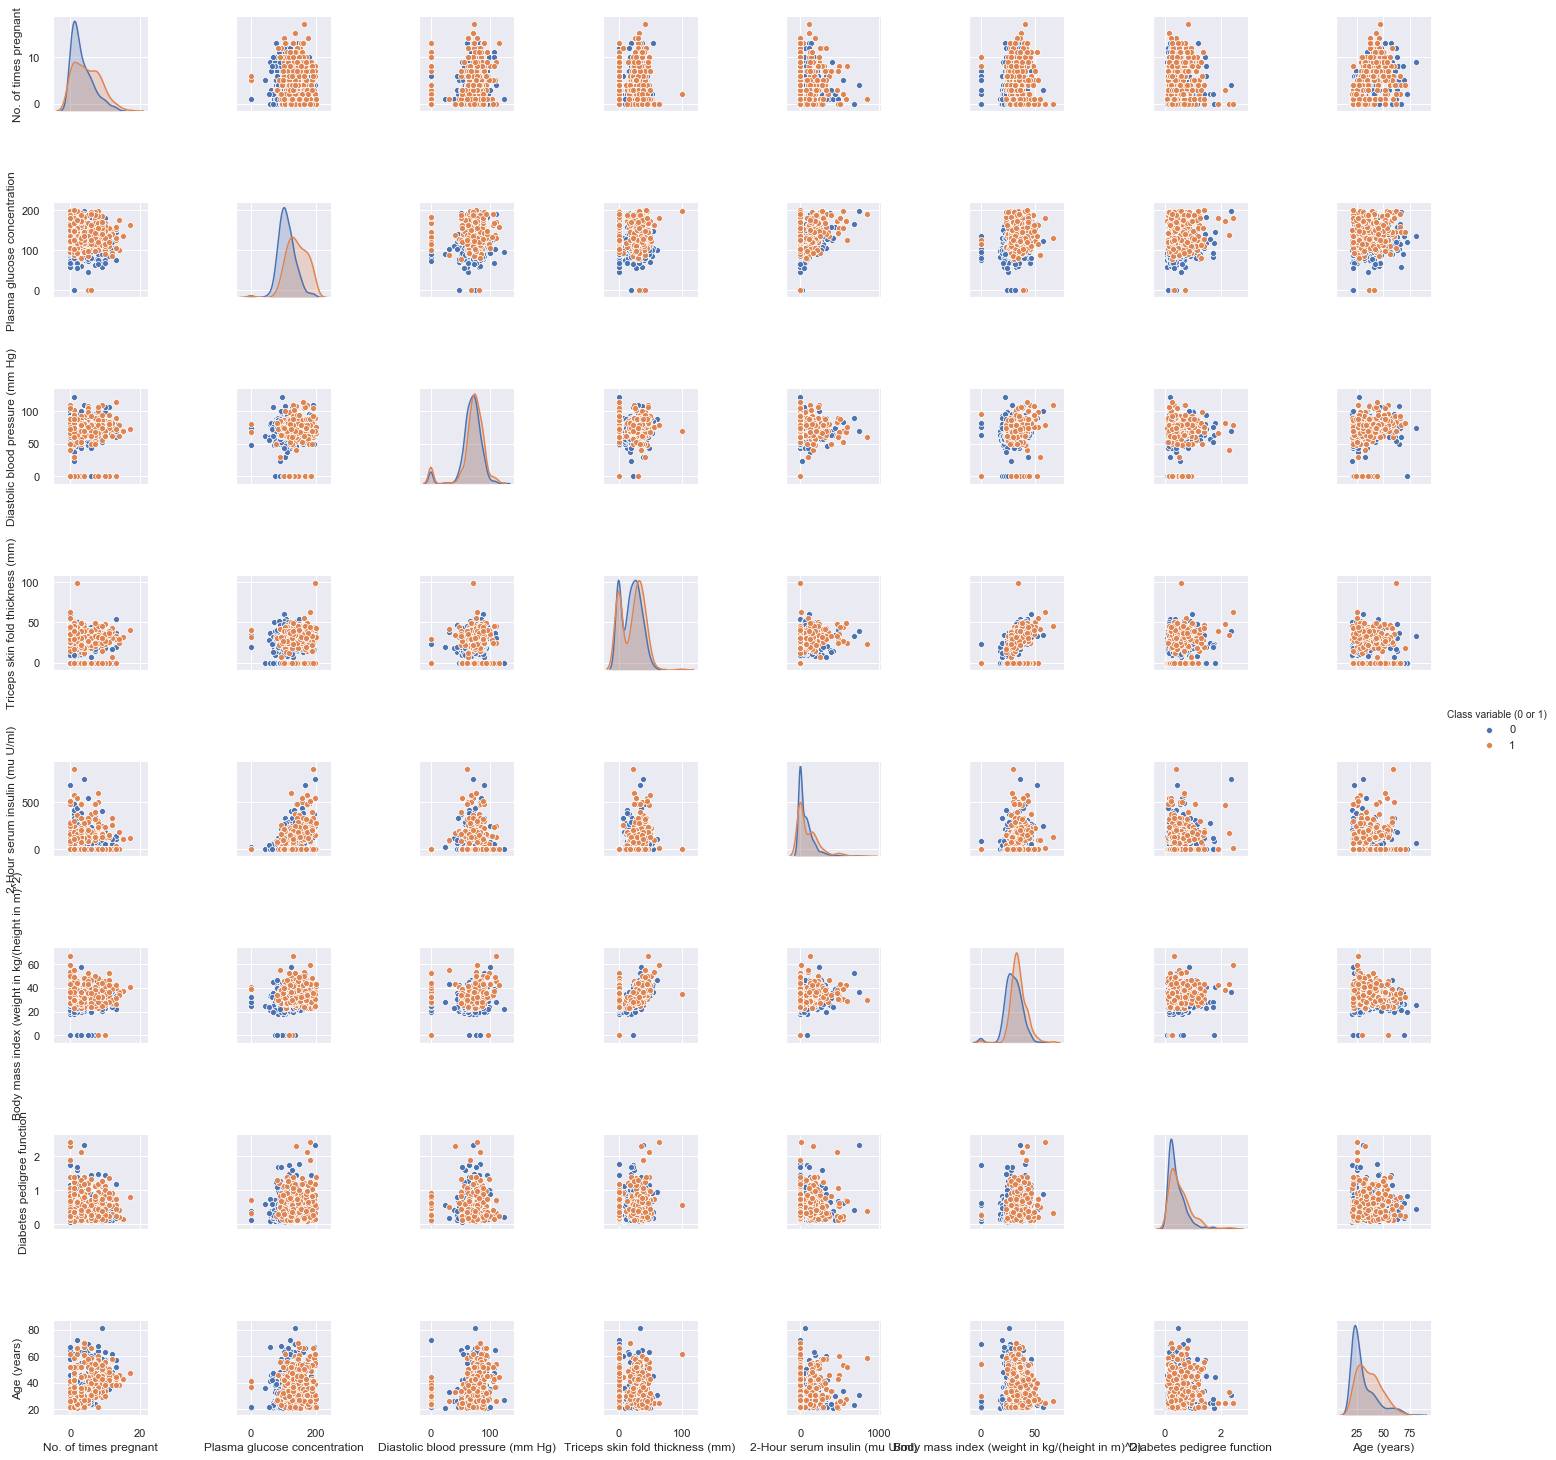

In [27]:
sns.pairplot(df, hue='Class variable (0 or 1)')

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [24]:
X

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable (0 or 1), Length: 768, dtype: int64

### Split the Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Implement the SVM Model

In [28]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7359307359307359

In [29]:
param_grid = [{'C': [0.001, 0.01,0.1,1,10,100], 'gamma': [0.01,0.001], 'kernel': ['linear','poly','rbf','sigmoid']}]
grid=GridSearchCV(model,param_grid=param_grid, cv=11, n_jobs=-1)

In [30]:
grid.fit(X_train, y_train)
print('Score is  : ' + str(grid.score(X_test,y_test)))

Score is  : 0.7316017316017316


In [31]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [33]:
y_pred=grid.predict(X_test)

### Measure Accuracy

In [34]:
matrix = confusion_matrix(y_test, y_pred)
print('Accuracy is : ' + str(accuracy_score(y_test, y_pred)))
print (matrix)

Accuracy is : 0.7316017316017316
[[128  22]
 [ 40  41]]


In [35]:
# Displaying summary of the precision, recall, F1 score for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [36]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print (confusion_matrix)

Predicted    0   1  All
Actual                 
0          128  22  150
1           40  41   81
All        168  63  231


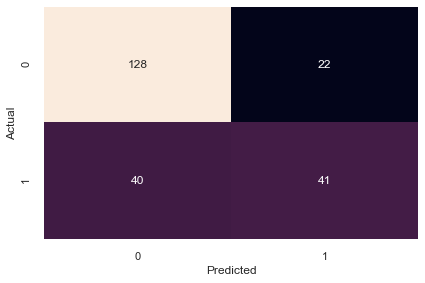

In [37]:
sns.set(rc={'figure.figsize':(6.7,4.27)})
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True,fmt="d",cbar=False)
